[*********************100%%**********************]  1 of 1 completed
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.25      0.20      0.22         5

    accuracy                           0.86        51
   macro avg       0.58      0.57      0.57        51
weighted avg       0.85      0.86      0.86        51



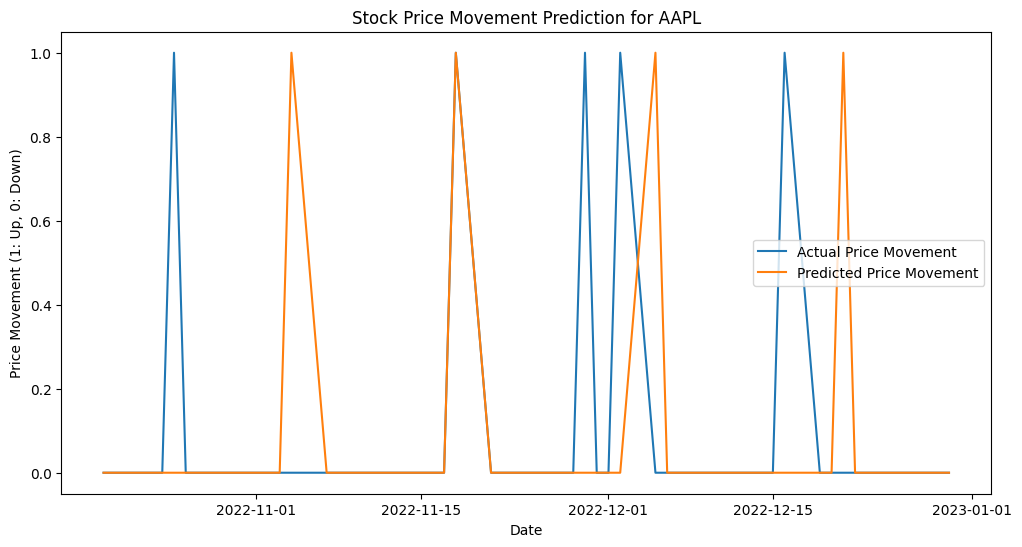

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define the stock symbol and download historical data
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

data = yf.download(stock_symbol, start=start_date, end=end_date)

# Feature engineering: create additional features if needed
# For simplicity, let's use only the adjusted closing price as the feature
data['PriceMovement'] = np.where(data['Adj Close'].shift(-126) > data['Adj Close'], 1, 0)

# Drop rows with missing values
data = data.dropna()

# Features and target variable
X = data[['Adj Close']]
y = data['PriceMovement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional classification metrics
print(classification_report(y_test, y_pred))

# Plot the stock prices and predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test.values, label='Actual Price Movement')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price Movement')
plt.xlabel('Date')
plt.ylabel('Price Movement (1: Up, 0: Down)')
plt.title(f'Stock Price Movement Prediction for {stock_symbol}')
plt.legend()
plt.show()
